In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heptapod/titanic")

print("Path to dataset files:", path)

In [1]:
import numpy as np
import pandas as pd

In [20]:
data_path = 'data/titanic/'
train_data = pd.read_csv(data_path + 'train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test_data = pd.read_csv(data_path + 'test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
from sklearn.ensemble import RandomForestClassifier

y = train_data['Survived']


X = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
X_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [24]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=1)

In [28]:
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [38]:
from utils.fastai import rf_feat_importance

fi = rf_feat_importance(model, X)
fi.head(10)

ImportError: cannot import name 'rf_feat_importance' from 'utils.fastai' (C:\Users\liude\PycharmProjects\hust\kaggle\utils\fastai.py)

<Axes: ylabel='cols'>

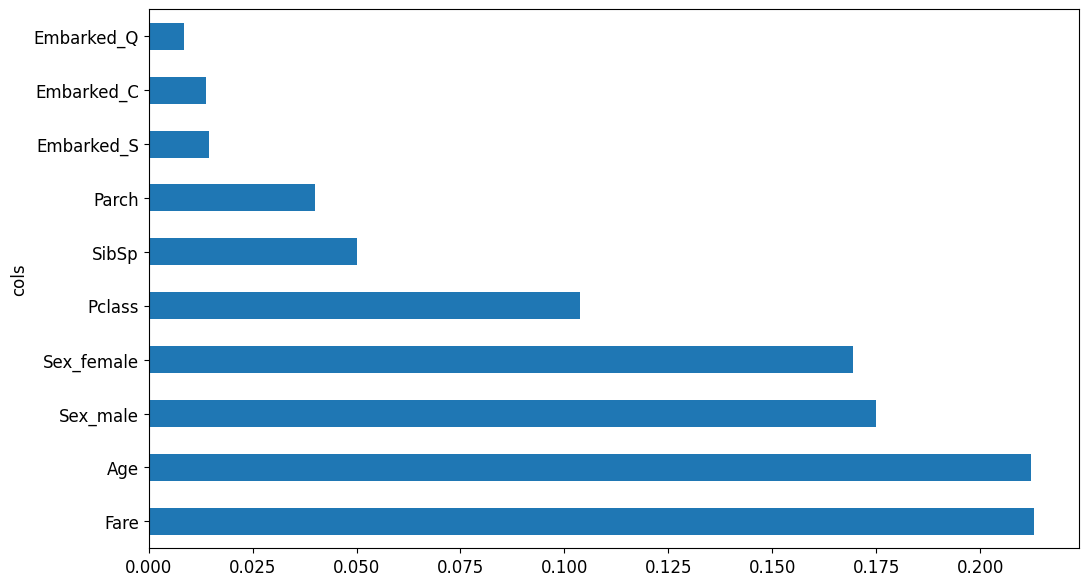

In [39]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)


plot_fi(fi)

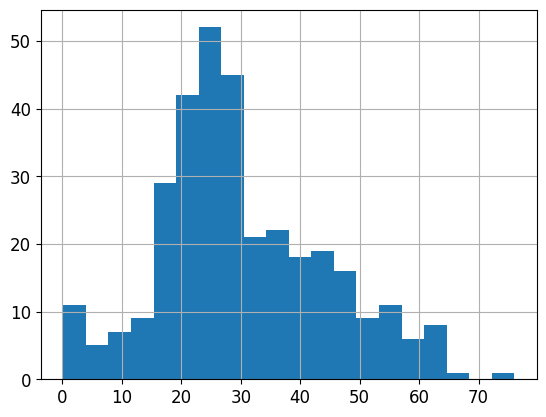

In [35]:
ax = X_test['Age'].hist(bins=20)

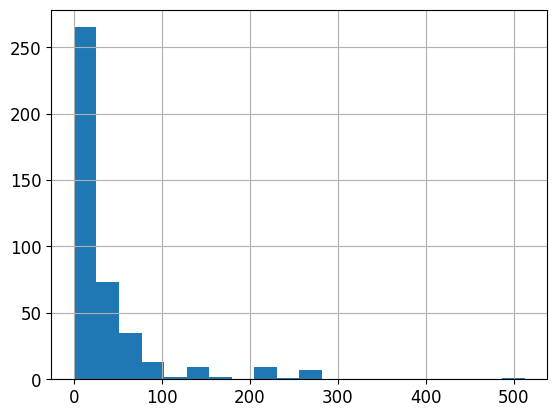

In [36]:
ax = X_test['Fare'].hist(bins=20)